## Part 1 EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load training data
train_df = pd.read_csv("Titanic_train.csv")
print(train_df.head())
print(train_df.info())
print(train_df.describe(include='all'))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

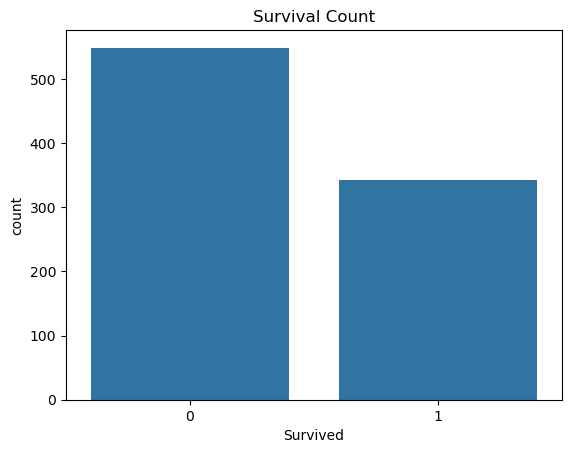

In [4]:
# Visualizations
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Count")
plt.show()

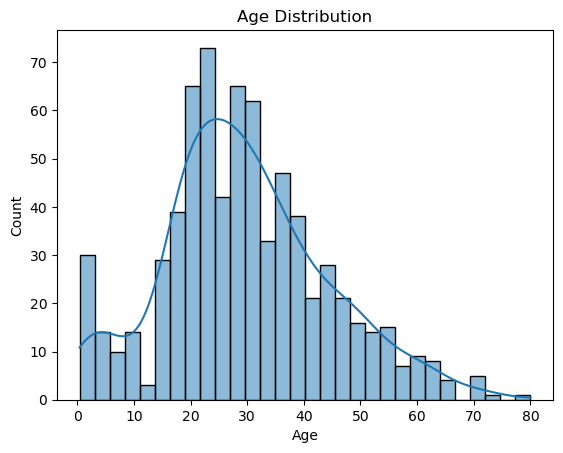

In [5]:
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

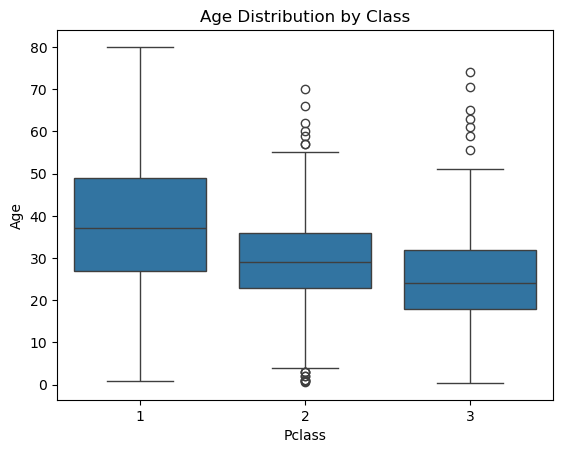

In [6]:
sns.boxplot(data=train_df, x='Pclass', y='Age')
plt.title("Age Distribution by Class")
plt.show()

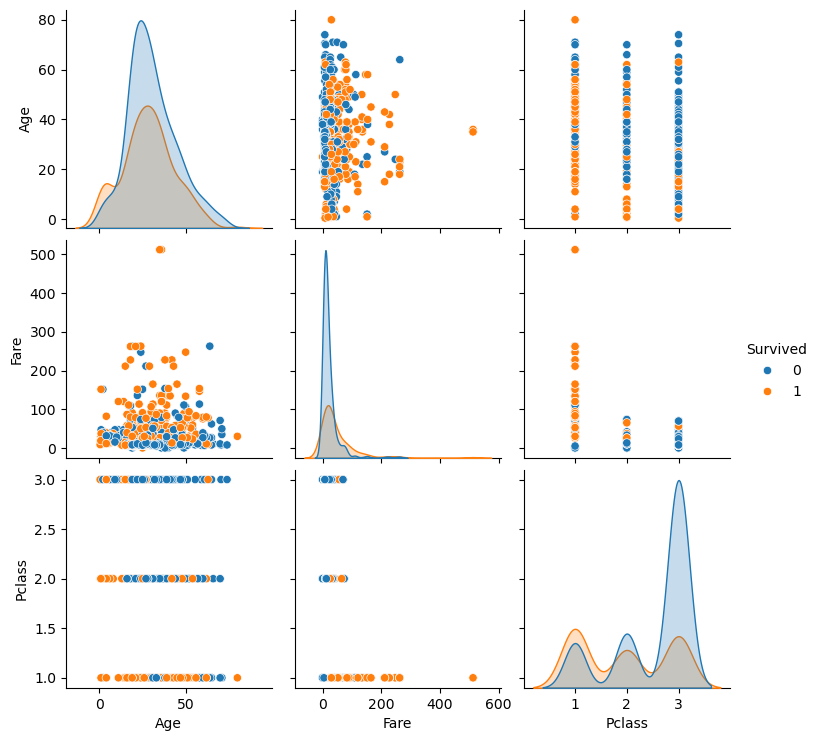

In [7]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

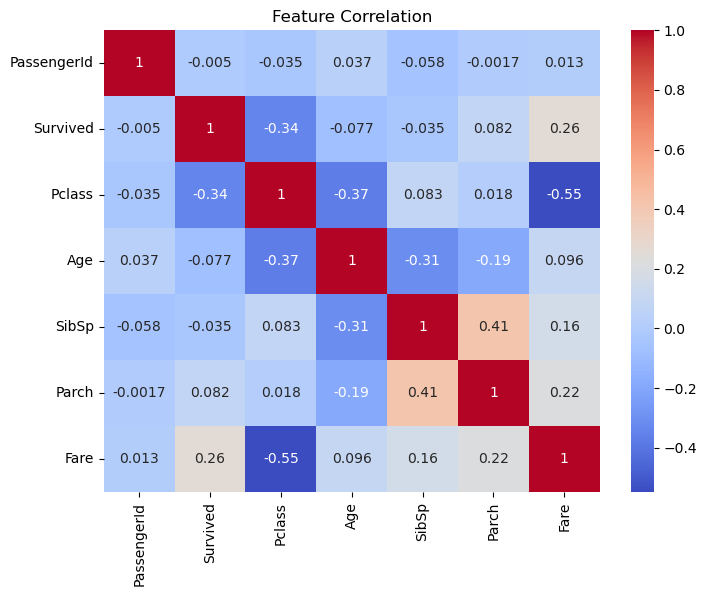

In [8]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

## Part 2 Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
print(train_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [13]:
train_df.columns = train_df.columns.str.strip()  # Remove leading/trailing spaces


In [14]:
if train_df['Embarked'].isnull().sum() > 0:
    most_common = train_df['Embarked'].mode()
    if not most_common.empty:
        train_df['Embarked'].fillna(most_common[0], inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_16288\1634392540.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(most_common[0], inplace=True)


In [15]:
# Encode categorical features
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])  # male=1, female=0
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

In [16]:
# Defining features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [17]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
test_data=pd.read_csv('Titanic_test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
test_data.drop('Cabin',inplace=True,axis=1)

In [20]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [21]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_16288\3204818668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)


In [22]:
test_data['Embarked'].fillna(test_data['Embarked'].mode().iloc[0],inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_16288\1721189239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Embarked'].fillna(test_data['Embarked'].mode().iloc[0],inplace=True)


In [23]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
test_data.drop(columns=['Name','Ticket'],inplace=True)

In [25]:
test_data=pd.get_dummies(test_data,columns=['Sex','Embarked'],dtype=int)
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0,1,0,1,0
1,893,3,47.00000,1,0,7.0000,1,0,0,0,1
2,894,2,62.00000,0,0,9.6875,0,1,0,1,0
3,895,3,27.00000,0,0,8.6625,0,1,0,0,1
4,896,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1306,1,39.00000,0,0,108.9000,1,0,1,0,0
415,1307,3,38.50000,0,0,7.2500,0,1,0,0,1
416,1308,3,30.27259,0,0,8.0500,0,1,0,0,1


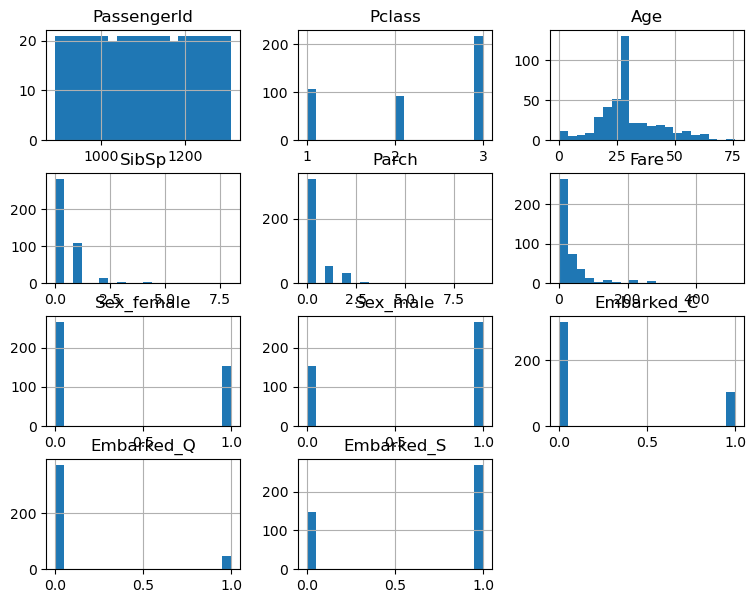

In [26]:
test_data.hist(bins=20,figsize=(9,7))
plt.show()


## Part 3 (Model Building)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Build and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Partner, Mr. Austen'

## Part 4 (Model Evaluation)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Predict
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

In [ ]:
# Classification report
print(classification_report(y_val, y_pred))

In [ ]:
# ROC-AUC
roc_auc = roc_auc_score(y_val, y_prob)
print("ROC-AUC Score:", roc_auc)

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Part 5 (Interpretation)

In [ ]:
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coeffs)

## Part 6 (Streamlit Deployment)

In [ ]:
import streamlit as st
import pandas as pd
import pickle

In [ ]:
dir(pickle)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

In [ ]:
# Save the trained model to a file
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
# Load model
model = pickle.load(open("logistic_model.pkl", "rb"))

st.title("Titanic Survival Prediction App")

In [ ]:
# User inputs
age = st.slider("Age", 0, 100, 25)
fare = st.slider("Fare", 0.0, 500.0, 32.2)
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ['male', 'female'])
sibsp = st.number_input("Number of Siblings/Spouses", 0, 8, 0)
parch = st.number_input("Number of Parents/Children", 0, 6, 0)
embarked = st.selectbox("Port of Embarkation", ['C', 'Q', 'S'])

In [ ]:
# Encode inputs
sex = 1 if sex == 'male' else 0
embarked_map = {'C': 0, 'Q': 1, 'S': 2}
embarked = embarked_map[embarked]

In [ ]:
# Create DataFrame
input_data = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked]],
                          columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

In [ ]:
# Predict
if st.button("Predict"):
    prediction = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]
    st.write(f"### Prediction: {'Survived' if prediction == 1 else 'Did Not Survive'} (Prob: {prob:.2f})")

In [ ]:
import pickle
pickle.dump(model, open("logistic_model.pkl", "wb"))

In [ ]:
pip show streamlit

In [ ]:
pip install streamlit

In [ ]:
import streamlit as st

st.title("Test App")
st.write("If you see this, your Streamlit is working!")

In [36]:
streamlit_run app.py

SyntaxError: invalid syntax (671661569.py, line 1)

In [ ]:
#Link for the app https://assignments.streamlit.app/

## Interview Questions

In [ ]:
'''Que 1 - What is the difference between precision and recall?

Precision measures quality out of all instances the model labeled positive, what fraction were actually positive.High precision means few false positives.

Recall measures completeness out of all actual positive instances in the data, what fraction did the model successfully find.High recall means few false negatives.


Que 2 - What is cross-validation, and why is it important in binary classification?

Cross‑validation (CV) is a model‑evaluation strategy that repeatedly splits the available labeled data into training and validation folds, fits the model on each training fold, and scores it on the corresponding held‑out fold.'''